In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Load dataset
file_path_2024 = 'data_latest/Most Streamed Spotify Songs 2024.csv'

In [29]:
# Read dataset
data_2024 = pd.read_csv(file_path_2024, encoding='ISO-8859-1')

In [30]:
# Display the first few rows of each dataset to understand their structure
print(data_2024.head())

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

In [31]:
# Convert 'Release Date' to datetime format
data_2024['Release Date'] = pd.to_datetime(data_2024['Release Date'])

# Extract month and year from 'Release Date'
data_2024['Release Month'] = data_2024['Release Date'].dt.month
data_2024['Release Year'] = data_2024['Release Date'].dt.year

In [32]:
# Convert 'All Time Rank' to numeric, coercing errors to NaN
data_2024['All Time Rank'] = pd.to_numeric(data_2024['All Time Rank'], errors='coerce')

# Drop rows with NaN values in 'All Time Rank'
data_2024 = data_2024.dropna(subset=['All Time Rank'])

# Analyze song rank and release date
release_analysis_2024 = data_2024.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

In [33]:
print(release_analysis_2024)

     Release Year  Release Month  All Time Rank
0            2010              1     852.500000
1            2011              1     662.000000
2            2011             10     964.000000
3            2011             11     550.000000
4            2012              1     734.000000
..            ...            ...            ...
114          2024              2     522.520000
115          2024              3     399.897436
116          2024              4     439.382979
117          2024              5     436.529412
118          2024              6     320.473684

[119 rows x 3 columns]


In [34]:
# Filter to keep only the top 100 ranks
data_top_2024 = data_2024[data_2024['All Time Rank'] <= 100]

# Analyze song rank and release date
release_analysis_top_2024 = data_top_2024.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

print(release_analysis_top_2024)

    Release Year  Release Month  All Time Rank
0           2015             12      28.000000
1           2017              1      52.000000
2           2017              3      81.000000
3           2019              3      75.000000
4           2019              5      40.000000
5           2019             11      56.000000
6           2020              4      77.000000
7           2020              6      71.000000
8           2021              6      82.000000
9           2021              7      27.000000
10          2021             10      88.000000
11          2022              2      66.000000
12          2022              3      20.000000
13          2022              5      59.666667
14          2022              7      92.000000
15          2022              8      48.000000
16          2022              9      60.000000
17          2022             10      53.000000
18          2022             12      74.000000
19          2023              1      53.750000
20          2

In [35]:
# Include track names in the analysis
release_analysis_top_2024 = data_top_2024.groupby(['Release Year', 'Release Month', 'Track', 'Artist'])[['All Time Rank']].mean().reset_index()

# Convert 'Release Month' to string and zero-pad it
release_analysis_top_2024['Release Month'] = release_analysis_top_2024['Release Month'].astype(int).astype(str).str.zfill(2)

# Combine year and month into a datetime format
release_analysis_top_2024['Release Date'] = pd.to_datetime(release_analysis_top_2024['Release Year'].astype(str) + '-' + release_analysis_top_2024['Release Month'])

# Drop rows with NaT values in 'Release Date' if any
release_analysis_top_2024 = release_analysis_top_2024.dropna(subset=['Release Date'])

# Sort the data by release date
release_analysis_top_2024 = release_analysis_top_2024.sort_values('Release Date')

In [36]:
highest_song = release_analysis_top_2024.loc[release_analysis_top_2024['All Time Rank'].idxmin()]

oldest_song = release_analysis_top_2024.loc[release_analysis_top_2024['Release Date'].idxmin()]

second_highest_song = release_analysis_top_2024.loc[release_analysis_top_2024['All Time Rank'].nsmallest(2).idxmax()]

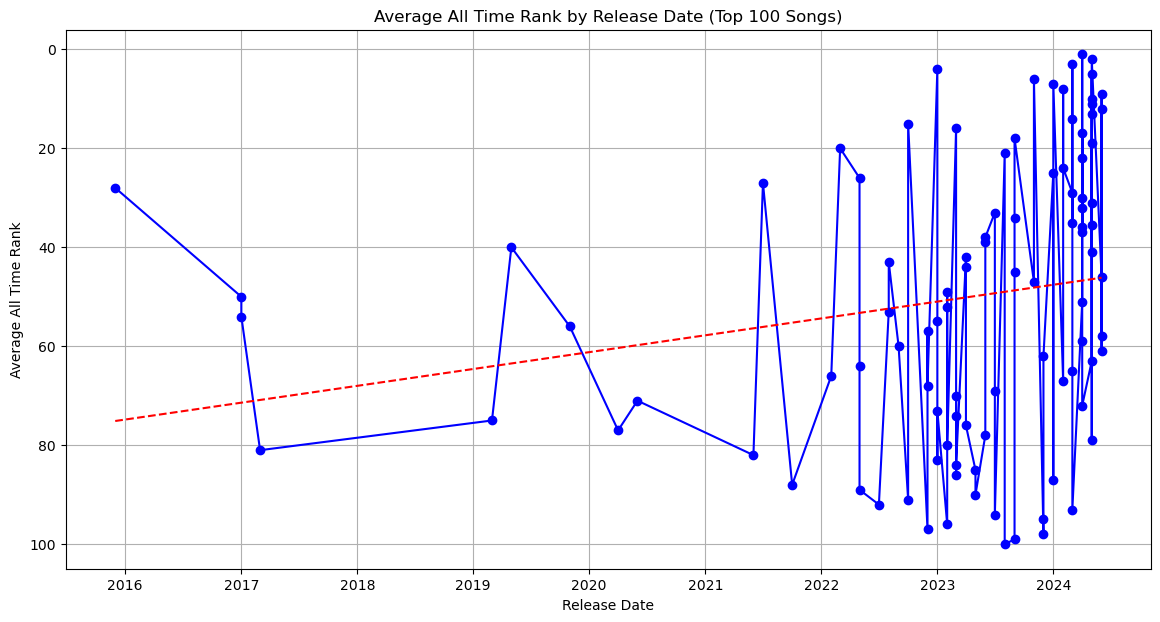

In [37]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(release_analysis_top_2024['Release Date'], release_analysis_top_2024['All Time Rank'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Average All Time Rank by Release Date (Top 100 Songs)')
plt.gca().invert_yaxis()  # Use gca() to get the current axes
plt.xlabel('Release Date')
plt.ylabel('Average All Time Rank')
plt.grid(True)

# Compute the best fit line
z = np.polyfit(release_analysis_top_2024['Release Date'].map(pd.Timestamp.toordinal), release_analysis_top_2024['All Time Rank'], 1)
p = np.poly1d(z)
plt.plot(release_analysis_top_2024['Release Date'], p(release_analysis_top_2024['Release Date'].map(pd.Timestamp.toordinal)), linestyle='--', color='r')

# Display the plot
plt.show()

Number of top 100 songs released in the past year: 50
   Release Year  Release Month  All Time Rank
0          2023              8      60.500000
1          2023              9      49.000000
2          2023             11      26.500000
3          2023             12      85.000000
4          2024              1      39.666667
5          2024              2      33.000000
6          2024              3      39.833333
7          2024              4      35.700000
8          2024              5      28.750000
9          2024              6      37.200000


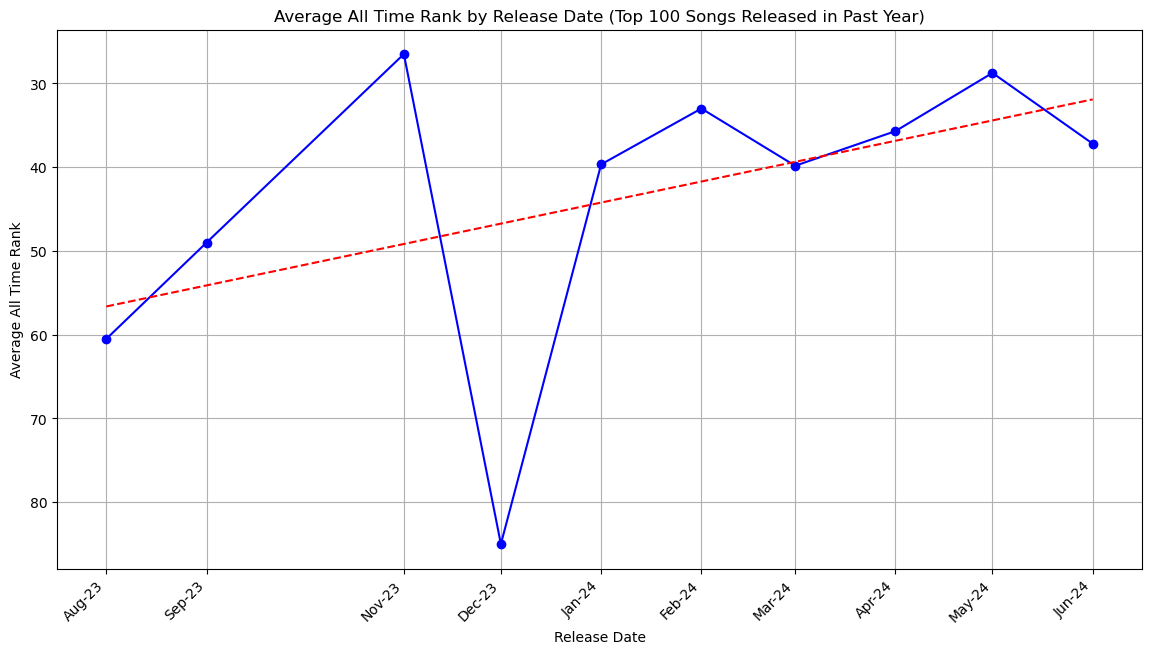

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path_2024 = 'data_latest/Most Streamed Spotify Songs 2024.csv'

# Read dataset
data_2024 = pd.read_csv(file_path_2024, encoding='ISO-8859-1')

# Convert 'Release Date' to datetime format
data_2024['Release Date'] = pd.to_datetime(data_2024['Release Date'])

# Extract month and year from 'Release Date'
data_2024['Release Month'] = data_2024['Release Date'].dt.month
data_2024['Release Year'] = data_2024['Release Date'].dt.year

# Convert 'All Time Rank' to numeric, coercing errors to NaN
data_2024['All Time Rank'] = pd.to_numeric(data_2024['All Time Rank'], errors='coerce')

# Drop rows with NaN values in 'All Time Rank'
data_2024 = data_2024.dropna(subset=['All Time Rank'])

# Filter to keep only the top 100 ranks
data_top_2024 = data_2024[data_2024['All Time Rank'] <= 100]

# Filter songs released in the past year (from August 2023 to August 2024)
start_date = pd.Timestamp('2023-08-01')
end_date = pd.Timestamp('2024-08-01')
data_recent_year = data_top_2024[(data_top_2024['Release Date'] >= start_date) & (data_top_2024['Release Date'] < end_date)]

# Verify the number of songs
print(f"Number of top 100 songs released in the past year: {len(data_recent_year)}")

# Group by release month and year to find average rank
release_analysis_recent_year = data_recent_year.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

# Verify the grouped data
print(release_analysis_recent_year)

# Convert 'Release Month' to string and zero-pad it
release_analysis_recent_year['Release Month'] = release_analysis_recent_year['Release Month'].astype(int).astype(str).str.zfill(2)

# Combine year and month into a datetime format
release_analysis_recent_year['Release Date'] = pd.to_datetime(release_analysis_recent_year['Release Year'].astype(str) + '-' + release_analysis_recent_year['Release Month'])

# Sort the data by release date
release_analysis_recent_year = release_analysis_recent_year.sort_values('Release Date')

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(release_analysis_recent_year['Release Date'], release_analysis_recent_year['All Time Rank'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Average All Time Rank by Release Date (Top 100 Songs Released in Past Year)')
plt.gca().invert_yaxis()  # Invert y-axis to have 1 at the top
plt.xlabel('Release Date')
plt.ylabel('Average All Time Rank')
plt.grid(True)

# Create custom x-axis labels
xticks = release_analysis_recent_year['Release Date']
xticklabels = xticks.dt.strftime('%b-%y')
plt.xticks(ticks=xticks, labels=xticklabels, rotation=45, ha='right')

# Compute the best fit line
z = np.polyfit(release_analysis_recent_year['Release Date'].map(pd.Timestamp.toordinal), release_analysis_recent_year['All Time Rank'], 1)
p = np.poly1d(z)
plt.plot(release_analysis_recent_year['Release Date'], p(release_analysis_recent_year['Release Date'].map(pd.Timestamp.toordinal)), linestyle='--', color='r')

# Display the plot
plt.show()


December 2023 was the worst time to release a song.

November 23 and May 24 seem to be the best times.

Number of top 100 songs released in the past year: 50
   Release Year  Release Month  All Time Rank
0          2023              8      60.500000
1          2023              9      49.000000
2          2023             11      26.500000
3          2023             12      85.000000
4          2024              1      39.666667
5          2024              2      33.000000
6          2024              3      39.833333
7          2024              4      35.700000
8          2024              5      28.750000
9          2024              6      37.200000


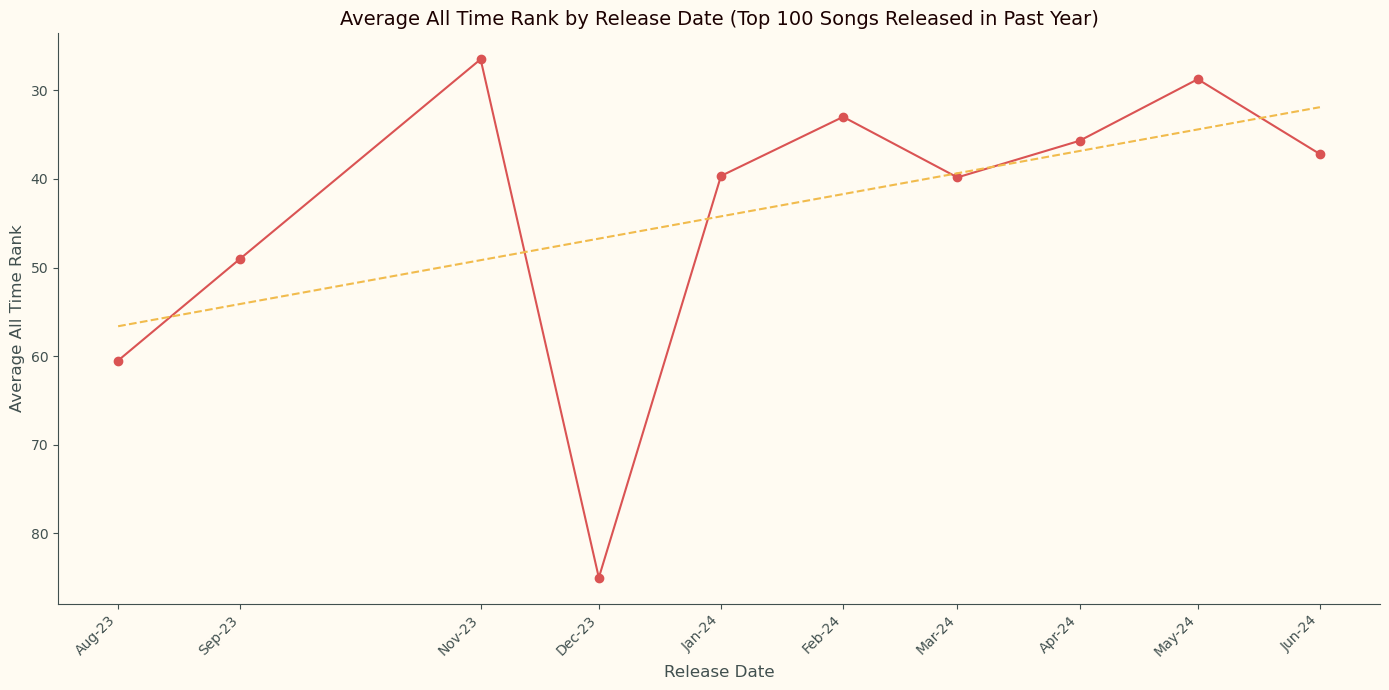

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path_2024 = 'data_latest/Most Streamed Spotify Songs 2024.csv'

# Read dataset
data_2024 = pd.read_csv(file_path_2024, encoding='ISO-8859-1')

# Convert 'Release Date' to datetime format
data_2024['Release Date'] = pd.to_datetime(data_2024['Release Date'])

# Extract month and year from 'Release Date'
data_2024['Release Month'] = data_2024['Release Date'].dt.month
data_2024['Release Year'] = data_2024['Release Date'].dt.year

# Convert 'All Time Rank' to numeric, coercing errors to NaN
data_2024['All Time Rank'] = pd.to_numeric(data_2024['All Time Rank'], errors='coerce')

# Drop rows with NaN values in 'All Time Rank'
data_2024 = data_2024.dropna(subset=['All Time Rank'])

# Filter to keep only the top 100 ranks
data_top_2024 = data_2024[data_2024['All Time Rank'] <= 100]

# Filter songs released in the past year (from August 2023 to August 2024)
start_date = pd.Timestamp('2023-08-01')
end_date = pd.Timestamp('2024-08-01')
data_recent_year = data_top_2024[(data_top_2024['Release Date'] >= start_date) & (data_top_2024['Release Date'] < end_date)]

# Verify the number of songs
print(f"Number of top 100 songs released in the past year: {len(data_recent_year)}")

# Group by release month and year to find average rank
release_analysis_recent_year = data_recent_year.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

# Verify the grouped data
print(release_analysis_recent_year)

# Convert 'Release Month' to string and zero-pad it
release_analysis_recent_year['Release Month'] = release_analysis_recent_year['Release Month'].astype(int).astype(str).str.zfill(2)

# Combine year and month into a datetime format
release_analysis_recent_year['Release Date'] = pd.to_datetime(release_analysis_recent_year['Release Year'].astype(str) + '-' + release_analysis_recent_year['Release Month'])

# Sort the data by release date
release_analysis_recent_year = release_analysis_recent_year.sort_values('Release Date')

# Plot the data
plt.figure(figsize=(14, 7), facecolor='#fffbf2')
plt.plot(release_analysis_recent_year['Release Date'], release_analysis_recent_year['All Time Rank'], marker='o', linestyle='-', color='#DA5353', label='Average All Time Rank')

# Add titles and labels
plt.title('Average All Time Rank by Release Date (Top 100 Songs Released in Past Year)', fontsize=14, color='#1c0101')
plt.gca().invert_yaxis()  # Invert y-axis to have 1 at the top
plt.xlabel('Release Date', fontsize=12, color='#1c0101')
plt.ylabel('Average All Time Rank', fontsize=12, color='#1c0101')
plt.grid(True)

# Create custom x-axis labels
xticks = release_analysis_recent_year['Release Date']
xticklabels = xticks.dt.strftime('%b-%y')
plt.xticks(ticks=xticks, labels=xticklabels, rotation=45, ha='right', color='#41504F')

# Compute the best fit line
z = np.polyfit(release_analysis_recent_year['Release Date'].map(pd.Timestamp.toordinal), release_analysis_recent_year['All Time Rank'], 1)
p = np.poly1d(z)
plt.plot(release_analysis_recent_year['Release Date'], p(release_analysis_recent_year['Release Date'].map(pd.Timestamp.toordinal)), linestyle='--', color='#F1BB4C', label='Trend Line')

# Removing gridlines and setting black axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#41504F')
plt.gca().spines['left'].set_color('#41504F')
plt.gca().xaxis.label.set_color('#41504F')
plt.gca().yaxis.label.set_color('#41504F')
plt.gca().tick_params(axis='x', colors='#41504F')
plt.gca().tick_params(axis='y', colors='#41504F')
plt.grid(False)
plt.gca().set_facecolor('#fffbf2')

# Display the plot
plt.tight_layout()
plt.show()


Number of top 100 songs released in the past year: 50
   Release Year  Release Month  All Time Rank
0          2023              8      60.500000
1          2023              9      49.000000
2          2023             11      26.500000
3          2023             12      85.000000
4          2024              1      39.666667
5          2024              2      33.000000
6          2024              3      39.833333
7          2024              4      35.700000
8          2024              5      28.750000
9          2024              6      37.200000


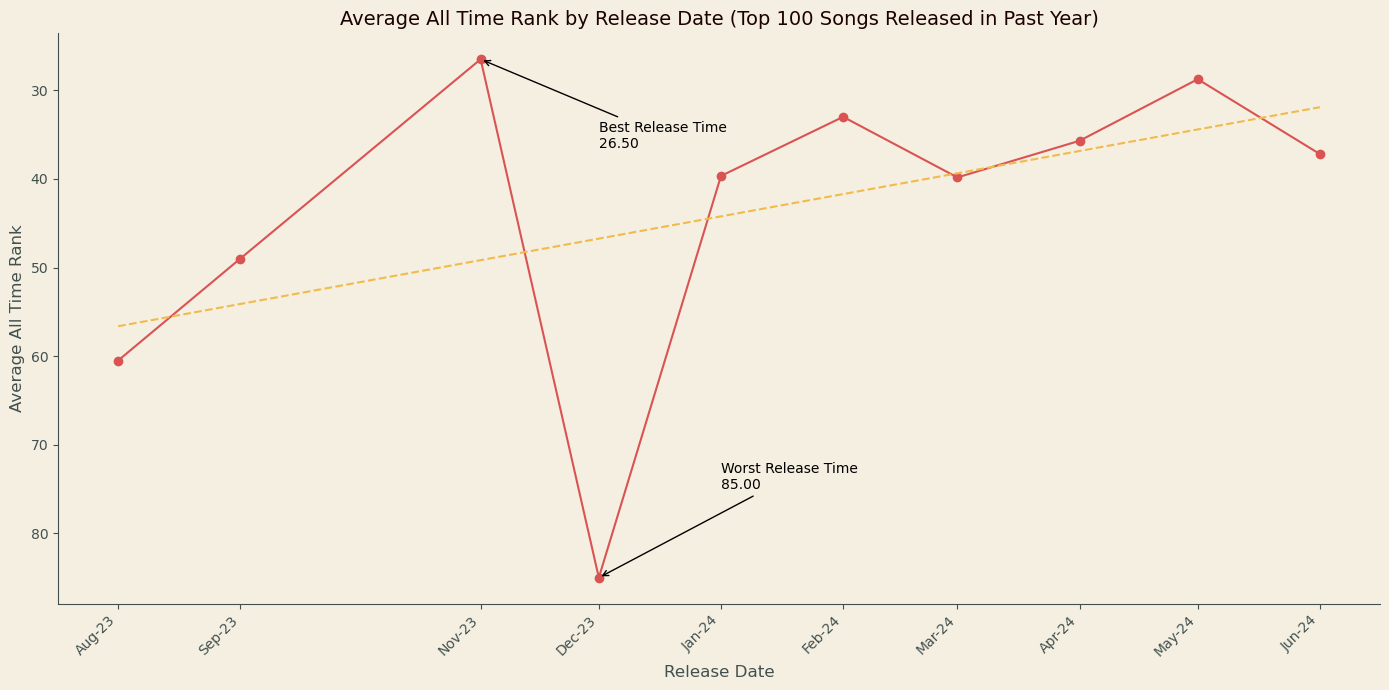

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path_2024 = 'data_latest/Most Streamed Spotify Songs 2024.csv'

# Read dataset
data_2024 = pd.read_csv(file_path_2024, encoding='ISO-8859-1')

# Convert 'Release Date' to datetime format
data_2024['Release Date'] = pd.to_datetime(data_2024['Release Date'])

# Extract month and year from 'Release Date'
data_2024['Release Month'] = data_2024['Release Date'].dt.month
data_2024['Release Year'] = data_2024['Release Date'].dt.year

# Convert 'All Time Rank' to numeric, coercing errors to NaN
data_2024['All Time Rank'] = pd.to_numeric(data_2024['All Time Rank'], errors='coerce')

# Drop rows with NaN values in 'All Time Rank'
data_2024 = data_2024.dropna(subset=['All Time Rank'])

# Filter to keep only the top 100 ranks
data_top_2024 = data_2024[data_2024['All Time Rank'] <= 100]

# Filter songs released in the past year (from August 2023 to August 2024)
start_date = pd.Timestamp('2023-08-01')
end_date = pd.Timestamp('2024-08-01')
data_recent_year = data_top_2024[(data_top_2024['Release Date'] >= start_date) & (data_top_2024['Release Date'] < end_date)]

# Verify the number of songs
print(f"Number of top 100 songs released in the past year: {len(data_recent_year)}")

# Group by release month and year to find average rank
release_analysis_recent_year = data_recent_year.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

# Verify the grouped data
print(release_analysis_recent_year)

# Convert 'Release Month' to string and zero-pad it
release_analysis_recent_year['Release Month'] = release_analysis_recent_year['Release Month'].astype(int).astype(str).str.zfill(2)

# Combine year and month into a datetime format
release_analysis_recent_year['Release Date'] = pd.to_datetime(release_analysis_recent_year['Release Year'].astype(str) + '-' + release_analysis_recent_year['Release Month'])

# Sort the data by release date
release_analysis_recent_year = release_analysis_recent_year.sort_values('Release Date')

# Find the highest and lowest points
highest_point = release_analysis_recent_year.loc[release_analysis_recent_year['All Time Rank'].idxmin()]
lowest_point = release_analysis_recent_year.loc[release_analysis_recent_year['All Time Rank'].idxmax()]

# Plot the data
plt.figure(figsize=(14, 7), facecolor='#f5efe1')
plt.plot(release_analysis_recent_year['Release Date'], release_analysis_recent_year['All Time Rank'], marker='o', linestyle='-', color='#DA5353', label='Average All Time Rank')

# Annotate the highest and lowest points
plt.annotate(f'Best Release Time\n{highest_point["All Time Rank"]:.2f}', 
             xy=(highest_point['Release Date'], highest_point['All Time Rank']), 
             xytext=(highest_point['Release Date'] + pd.DateOffset(months=1), highest_point['All Time Rank']+10),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             color='black')

plt.annotate(f'Worst Release Time\n{lowest_point["All Time Rank"]:.2f}', 
             xy=(lowest_point['Release Date'], lowest_point['All Time Rank']), 
             xytext=(lowest_point['Release Date'] + pd.DateOffset(months=1), lowest_point['All Time Rank']-10),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             color='black')

# Add titles and labels
plt.title('Average All Time Rank by Release Date (Top 100 Songs Released in Past Year)', fontsize=14, color='#1c0101')
plt.gca().invert_yaxis()  # Invert y-axis to have 1 at the top
plt.xlabel('Release Date', fontsize=12, color='#1c0101')
plt.ylabel('Average All Time Rank', fontsize=12, color='#1c0101')
plt.grid(True)

# Create custom x-axis labels
xticks = release_analysis_recent_year['Release Date']
xticklabels = xticks.dt.strftime('%b-%y')
plt.xticks(ticks=xticks, labels=xticklabels, rotation=45, ha='right', color='#41504F')

# Compute the best fit line
z = np.polyfit(release_analysis_recent_year['Release Date'].map(pd.Timestamp.toordinal), release_analysis_recent_year['All Time Rank'], 1)
p = np.poly1d(z)
plt.plot(release_analysis_recent_year['Release Date'], p(release_analysis_recent_year['Release Date'].map(pd.Timestamp.toordinal)), linestyle='--', color='#F1BB4C', label='Trend Line')

# Removing gridlines and setting black axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#41504F')
plt.gca().spines['left'].set_color('#41504F')
plt.gca().xaxis.label.set_color('#41504F')
plt.gca().yaxis.label.set_color('#41504F')
plt.gca().tick_params(axis='x', colors='#41504F')
plt.gca().tick_params(axis='y', colors='#41504F')
plt.grid(False)
plt.gca().set_facecolor('#f5efe1')

# Display the plot
plt.tight_layout()
plt.show()
